In [1]:
import os
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# Open grayscale and ground truth images and stack as a 3d array: cube and gt

cube = np.empty((520, 520, 520))

path = './datasets/grayscale/'


filenames = os.listdir(path)
filenames.sort()

for idx, filename in enumerate(filenames):
    with Image.open(os.path.join(path, filename), 'r') as img:
        cube[idx] = np.asarray(img)

groundtruth = h5py.File('./datasets/groundtruth.h5', 'r')
gt = groundtruth['stack']
    

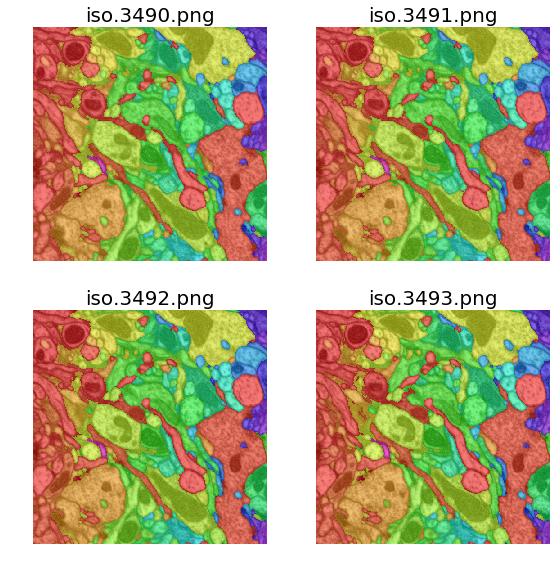

In [5]:
# Plot several images overlaying with groudtruth images: 

plt.figure(figsize=(8, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cube[i, :, :], cmap='gray')
    plt.imshow(gt[i, :, :], cmap='hsv', alpha=0.5)
    plt.axis('off')
    plt.title('iso.{}.png'.format(3490+i), fontsize=20)

plt.tight_layout()
plt.show()

In [10]:
with h5py.File('fib_small.h5', 'w') as h:
    dset = h.create_dataset('grayscale', data=cube)
    gtset = h.create_dataset('groundtruth', data=gt)
    

In [11]:
dset = h5py.File('fib_small.h5', 'r')

gry = dset['grayscale']
gt = dset['groundtruth']
